In [ ]:
!pip install pandas
!pip insatll matplotlib
!pip install seaborn

ERROR: unknown command "insatll" - maybe you meant "install"


In [ ]:
#Upload your csv file
from google.colab import files
uploaded = files.upload()

Saving rainfall.csv to rainfall.csv


In [ ]:
import pandas as pd

In [ ]:
# Load the uploaded csv file into pandas dataframe
import pandas as pd

# Get the file name of the uploaded csv
file_name = list(uploaded.keys())[0]

# Load the csv file into a pandas dataframe
data = pd.read_csv(file_name)

# Display the dataframe
print("Data preview : ")
print(data)               #print(data.head()) - reads first 5 data from 0-4      #print(data.tail()) - read last 5 data



Data preview : 
                     State/UT  Jan (%)  Feb (%)  Mar (%)  Apr (%)  May (%)  \
0              Andhra Pradesh      1.5      1.8      2.0      2.5      5.5   
1           Arunachal Pradesh      3.0      3.5      4.5      6.0      8.0   
2                       Assam      2.5      2.8      4.0      5.0     10.0   
3                       Bihar      0.5      1.0      2.0      2.5      8.0   
4                Chhattisgarh      0.5      1.0      1.5      2.0      5.0   
5                         Goa      0.3      0.5      1.0      1.5      3.0   
6                     Gujarat      0.3      0.5      1.0      1.5      5.0   
7                     Haryana      0.5      0.8      1.0      1.5      5.0   
8            Himachal Pradesh      2.0      2.5      3.0      4.0      8.0   
9             Jammu & Kashmir      3.0      4.0      6.0      8.0     10.0   
10                  Jharkhand      1.0      1.5      2.0      2.5      5.0   
11                  Karnataka      1.5      2.0 

In [ ]:
# Data Cleaning - ( Check for missing values)
print("Missing values : ")
print(data.isnull().sum())

# Filling missing values with 0
data.fillna(0, inplace=True)

# Optionally , convert column to numeric (If necessary)
#Exclude rainfall calssification from the column to be converted
monthly_columns = data.columns[1:-1]                                        # Assuming the first column is 'State' and remaining are months excluding 'Rainfall Classification'
data[monthly_columns] = data[monthly_columns].apply(pd.to_numeric, errors='coerce')                  # Apply pd.to_numeric only to the selected columns


Missing values : 
State/UT               0
Jan (%)                0
Feb (%)                0
Mar (%)                0
Apr (%)                0
May (%)                0
Jun (%)                0
Jul (%)                0
Aug (%)                0
Sep (%)                0
Oct (%)                0
Nov (%)                0
Dec (%)                0
Total Rainfall (mm)    0
Classification         0
dtype: int64


In [ ]:
# Calculate total annual rainfall and classify the states
monthly_columns = data.columns[1:-1]

# Convert all columns in monthly_columns to numeric before summing
for col in monthly_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data['Total Rainfall (mm)'] = data[monthly_columns].sum(axis=1)

# Classify rainfall based on the total annual rainfall value
def classify_rainfall(value):
    if value > 2500:
        return 'Extremely Heavy'
    elif value > 2000:
        return 'Very Heavy'
    elif value > 1000:
        return 'Heavy'
    elif value > 500:
        return 'Moderate'
    else:
        return 'Low'

data['Total Rainfall (mm)'] = data['Total Rainfall (mm)'].apply(classify_rainfall)

In [ ]:
# Check the data types of the columns
print(data['Total Rainfall (mm)'].dtype)

# Display the range of values in the 'Total Rainfall (mm)' column
print(data['Total Rainfall (mm)'].describe())

object
count        35
unique        5
top       Heavy
freq         15
Name: Total Rainfall (mm), dtype: object


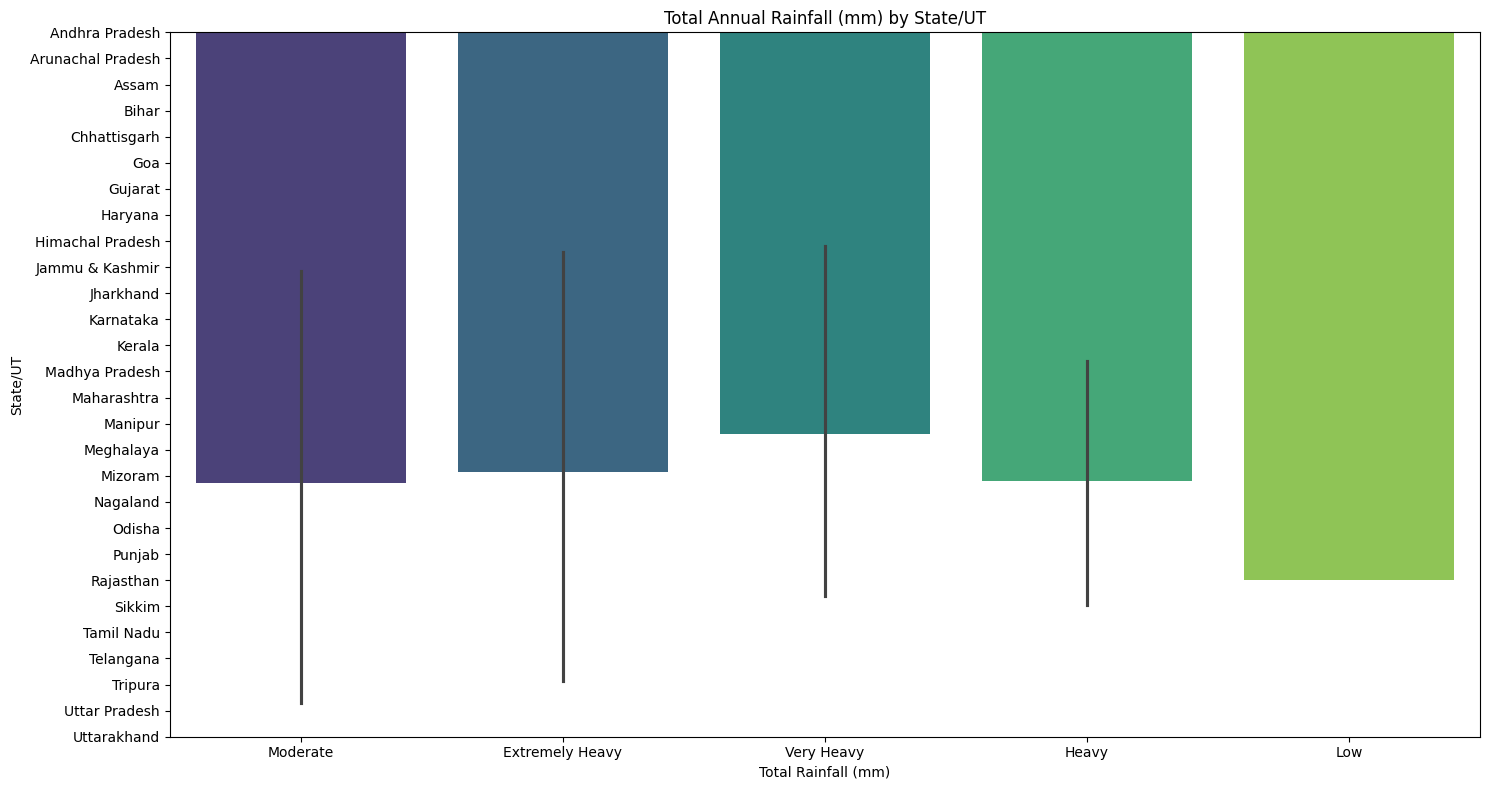

In [ ]:
# Visualization - Barplot of total annual rainfall (mm) by state
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

# Explicitly assign 'Total Rainfall (mm)' to the 'hue' parameter and set legend=False
sns.barplot(x='Total Rainfall (mm)', y='State/UT', data=data, palette='viridis', hue='Total Rainfall (mm)', legend=False)

plt.title('Total Annual Rainfall (mm) by State/UT')
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('State/UT')
plt.tight_layout()
plt.show()

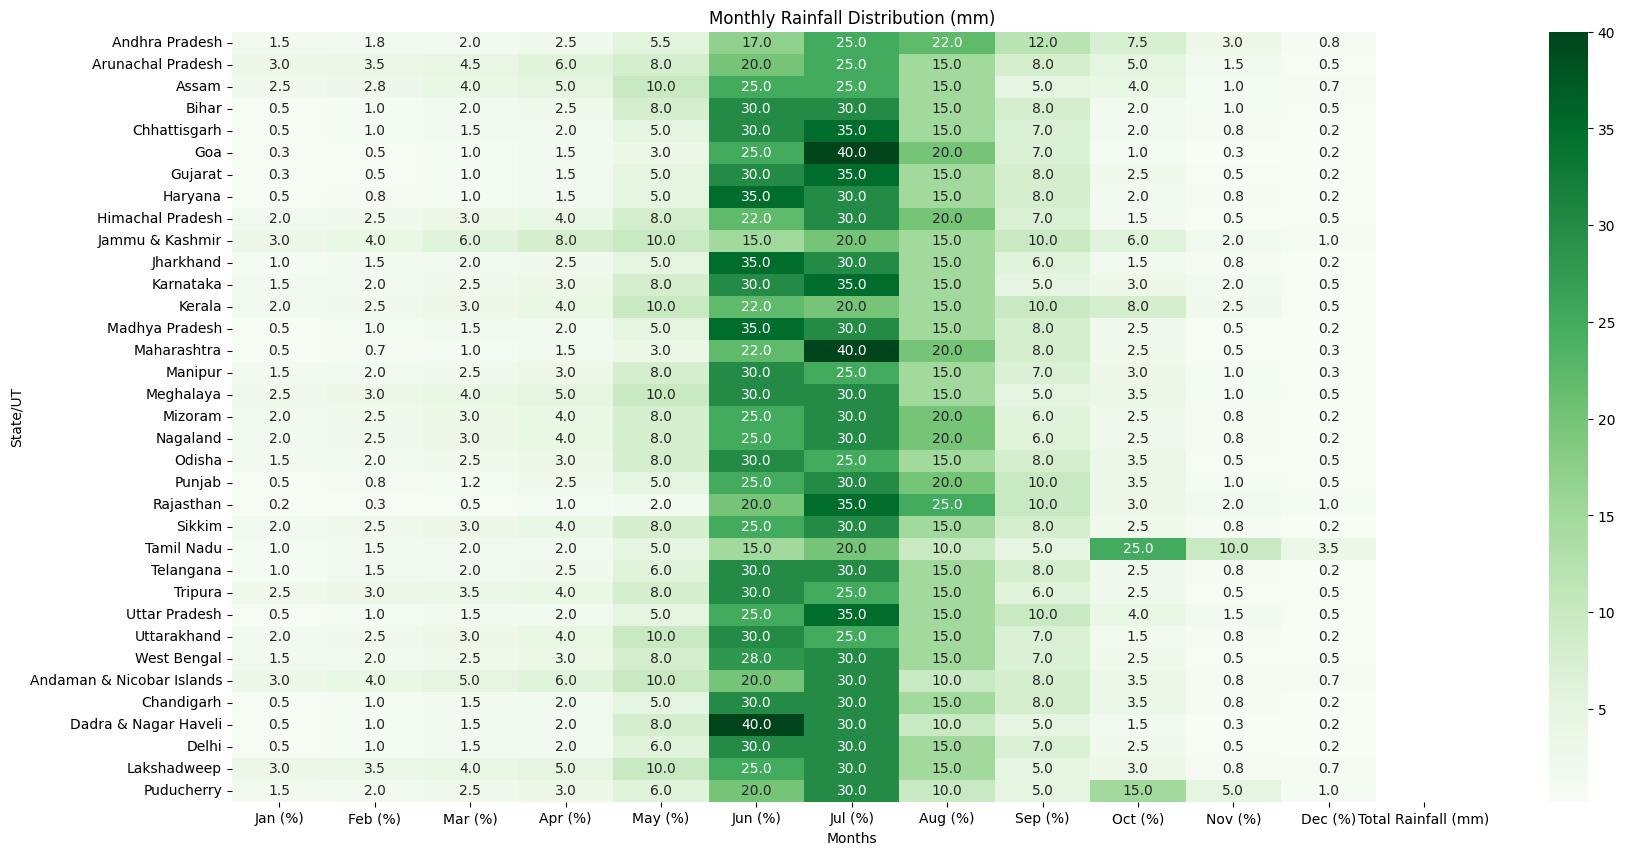

In [ ]:
# Visualization - Heatmap of monthly rainfall distribution (mm)
plt.figure(figsize=(20, 10))

# Exclude 'Total Rainfall (mm)' from the columns used for heatmap
heatmap_columns = data.columns[1:-1] # Select columns from 'JAN' to 'DEC'

# Convert columns to numeric before creating the heatmap
numeric_data = data[heatmap_columns].apply(pd.to_numeric, errors='coerce')

# Use the selected and converted columns for the heatmap
# set_index() is called on numeric_data to avoid the error
sns.heatmap(numeric_data.set_index(data['State/UT']), cmap='Greens', annot=True, fmt=".1f")

plt.title('Monthly Rainfall Distribution (mm)')
plt.ylabel('State/UT')
plt.xlabel('Months')
plt.show()

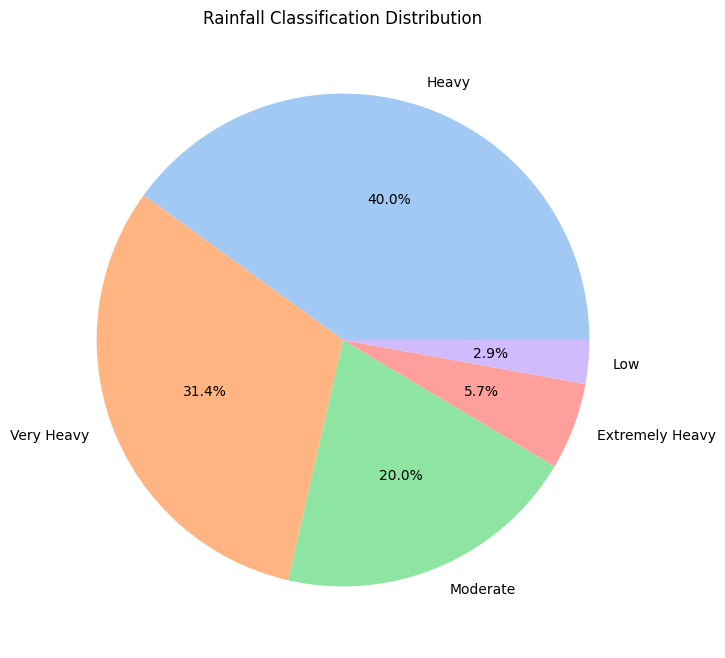

In [ ]:
# Visualization - Pie chart for rainfall classification distribution
classification_summary = data['Classification'].value_counts()
classification_summary.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=sns.color_palette('pastel'))
plt.title('Rainfall Classification Distribution')
plt.ylabel('')
plt.show()

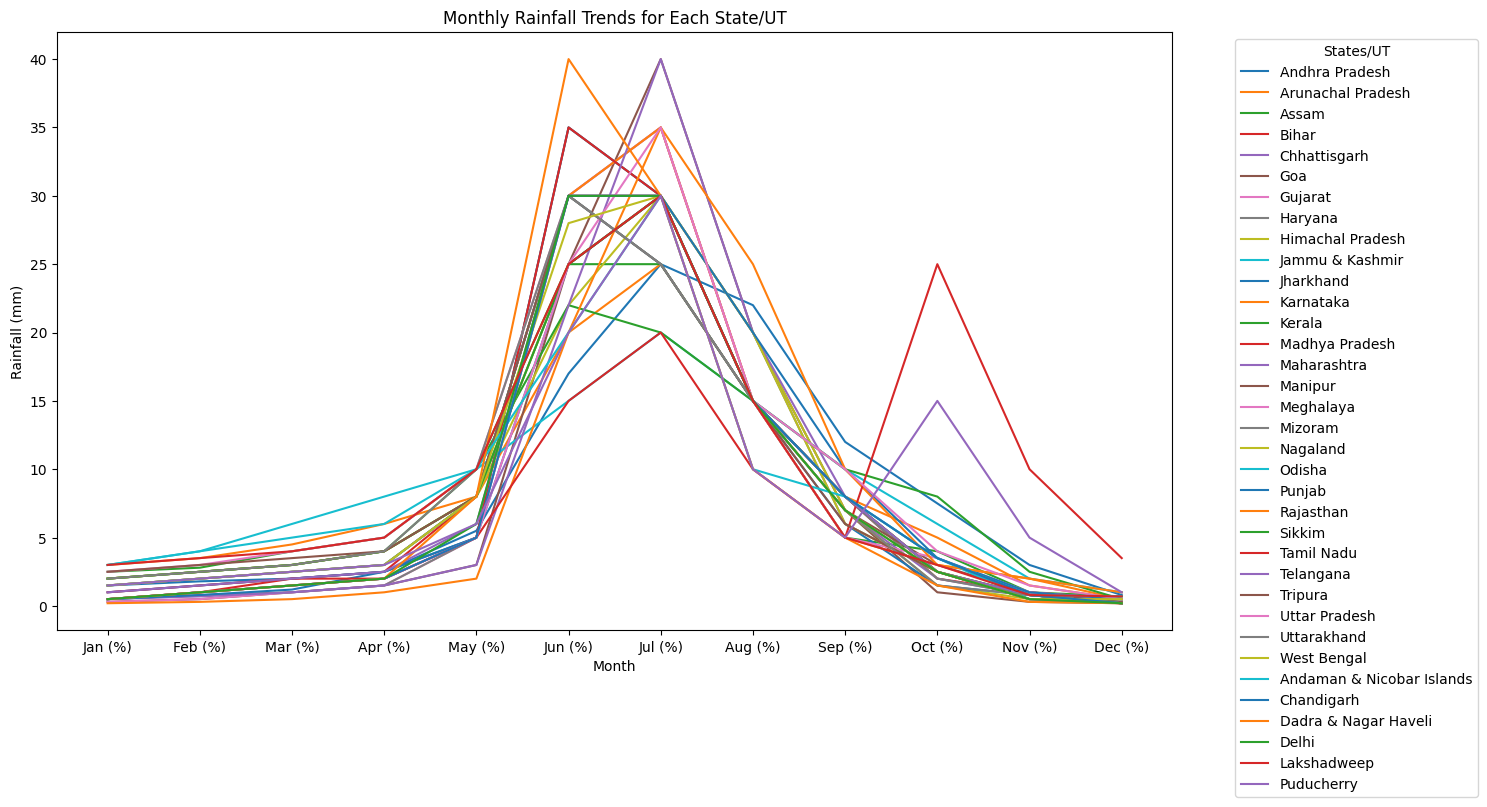

In [ ]:
# Line plot of monthly rainfall trends for each state
plt.figure(figsize=(15, 8))

# Reset 'Total Rainfall (mm)' column to numerical values for plotting
monthly_columns = data.columns[1:-2]  # Exclude 'Classification' and 'Total Rainfall (mm)'
data['Total Rainfall (mm)'] = data[monthly_columns].sum(axis=1)

# Plot all states in a line plot for monthly rainfall
for state in data['State/UT']:
    plt.plot(data.columns[1:-2], data.loc[data['State/UT'] == state, data.columns[1:-2]].values.flatten(), label=state)

plt.title('Monthly Rainfall Trends for Each State/UT')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')  # Changed y-axis label to reflect numerical values
plt.legend(title='States/UT', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

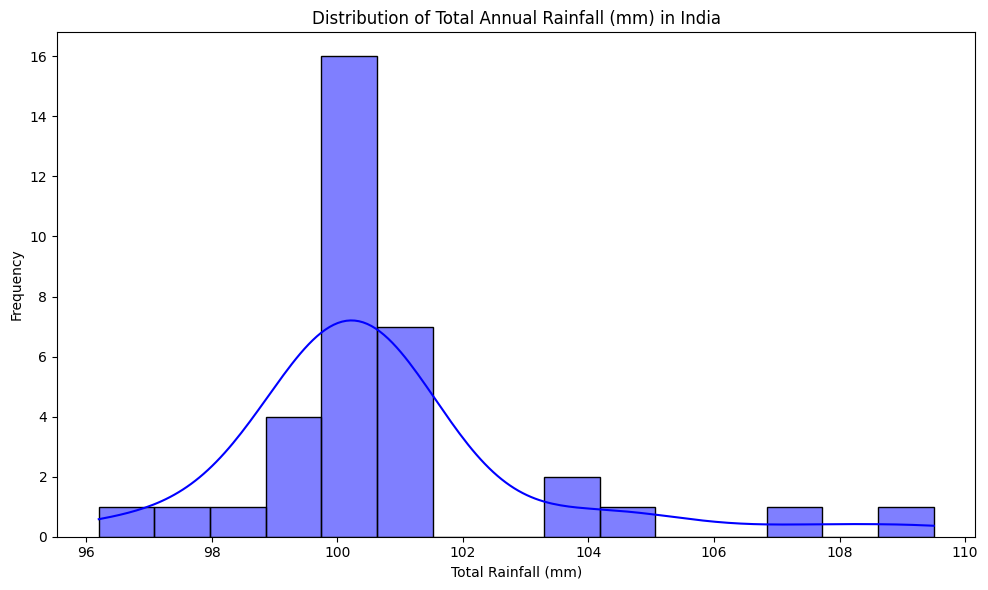

In [ ]:
# Histogram of Total Rainfall (mm)
plt.figure(figsize=(10, 6))

sns.histplot(data['Total Rainfall (mm)'], bins=15, kde=True, color='blue')

plt.title('Distribution of Total Annual Rainfall (mm) in India')
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

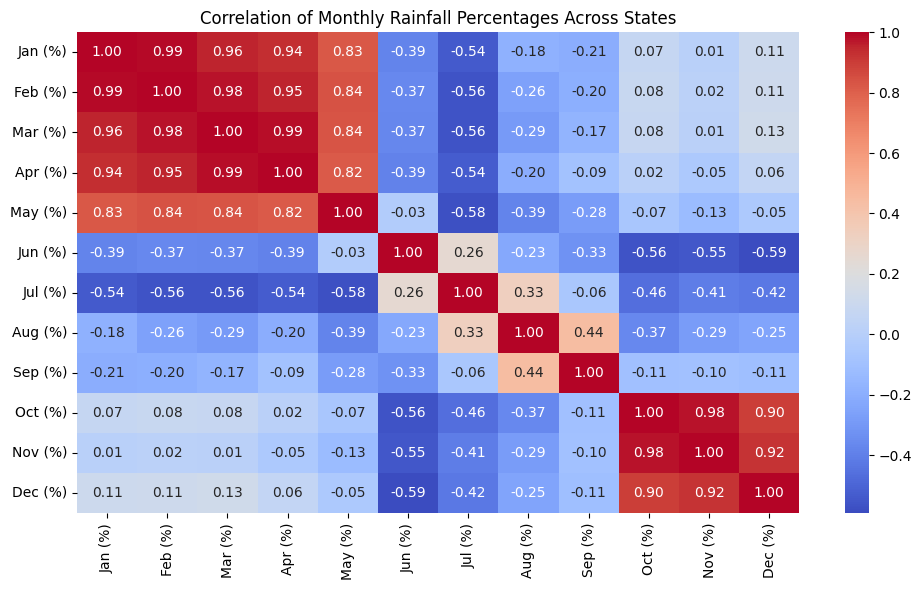

In [ ]:
# Correlation heatmap of monthly rainfall percentages
# 'State/UT' is removed from the columns to be dropped since it will be used for the index
monthly_rainfall = data.drop(columns=['Total Rainfall (mm)', 'Classification']).set_index('State/UT')

# Calculate correlation matrix
corr = monthly_rainfall.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('Correlation of Monthly Rainfall Percentages Across States')
plt.tight_layout()
plt.show()